# **Indian Startup Funding Analysis-Exploratory Data Analysis**

**Project Overview**

* **Goal**: Analyze India's startup funding ecosystem through comprehensive EDA to extract actionable business insights for investors, entrepreneurs, and policymakers.

* **Dataset**: Indian Unicorn Startups 2023 (102 companies with $1B+ valuations)



**Loading and First Look**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

## Basic dataset information

In [52]:
df.shape

(102, 8)

In [53]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [54]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


## Data quality Assessment

##Check data types and missing values

In [55]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [56]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


##Check for duplicates

In [57]:
df.duplicated().sum()

np.int64(0)

## Basic statics

In [58]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


Key isights to Discuss:

*   Dataset contains 102 indian unicorn startups
*   No missing values (clean dataset)
*   Mix of categorical and numerical data



#Data Processing

##Clean colummns names

In [59]:
df.columns = df.columns.str.strip()

##Convert Entry columns to datetime

In [60]:
df['Entry_Date'] = pd.to_datetime(df['Entry'], format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [61]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


##Create valuation Growth metric

In [62]:
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


## Extract primary city(before'/')

In [63]:
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


## Count the number of investors

In [64]:
df['investor_Count'] = df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


## Univariata Analysis

## Vluation Distrubution Analysis

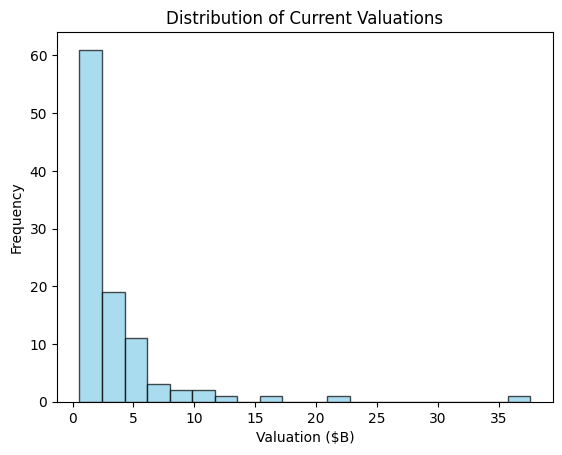

In [65]:
plt.hist(df['Valuation ($B)'], bins=20,alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Current Valuations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

##key insights
- Highly right-skewed ditribution(few mega-unicorns
- Median valuation around 2-3B Flifkartdominateswith37.6B valuation
- Most unicorns clustered in$1-5B range

## Sector Analysis

## Sector Disrubation

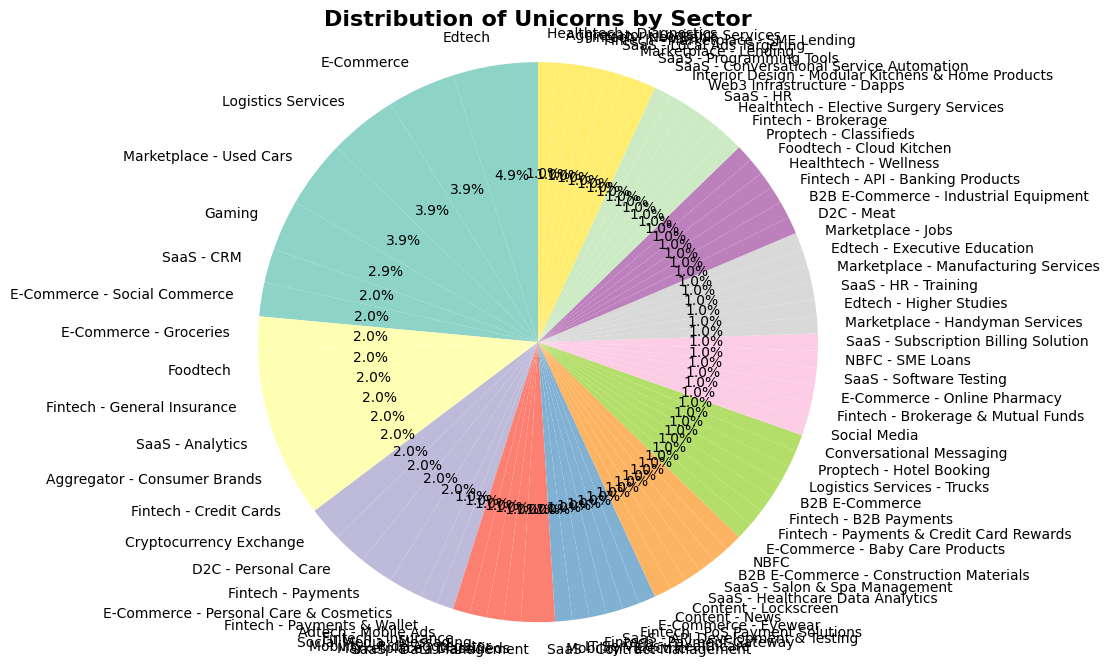

In [66]:
plt.figure(figsize=(12,8))

sector_counts = df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%', colors=colors,startangle=90)
plt.title('Distribution of Unicorns by Sector', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

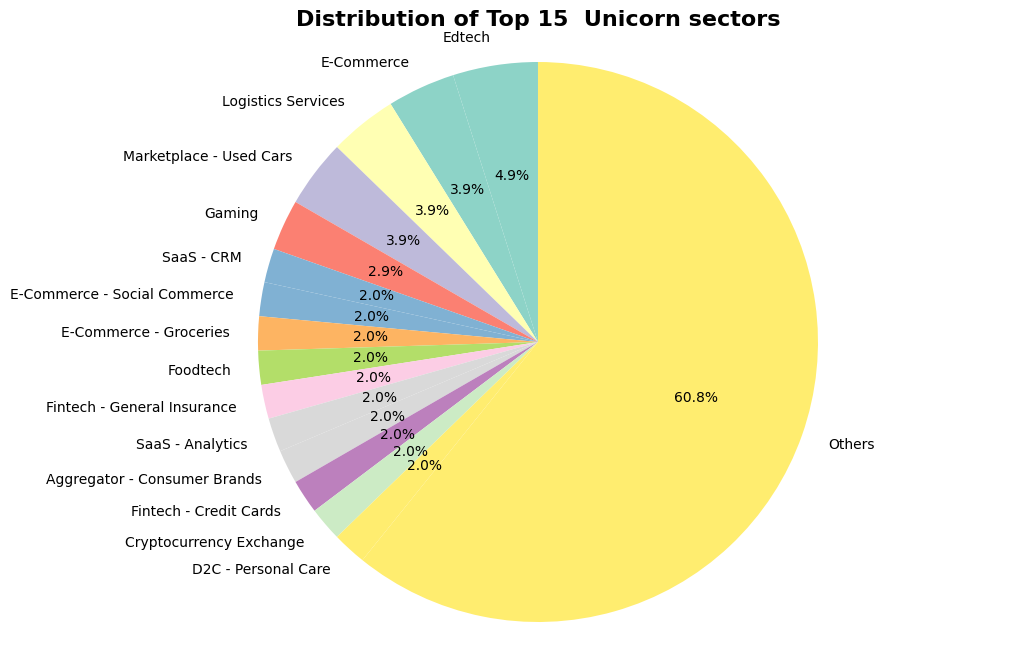

In [67]:
def display_top_k_sectors(df,k):
  sector_count = df['Sector'].value_counts()

  # Select top K sectors and group the rest as 'Others'
  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    other_sectors_count = sector_counts.iloc[k:].sum()
    top_sectors['Others'] = other_sectors_count
  else:
    top_sectors = sector_counts

  plt.figure(figsize=(12,8))
  colors = plt.cm.Set3(np.linspace(0,1,len(top_sectors)))

  plt.pie(top_sectors.values, labels=top_sectors.index, autopct='%1.1f%%', colors=colors, startangle=90)
  plt.title(f'Distribution of Top {k}  Unicorn sectors', fontsize=16, fontweight='bold')
  plt.axis('equal')
  plt.show()

# Call the function with k=5 tp display top 5 sectors
display_top_k_sectors(df,15)

## Top Sectors bar Chart

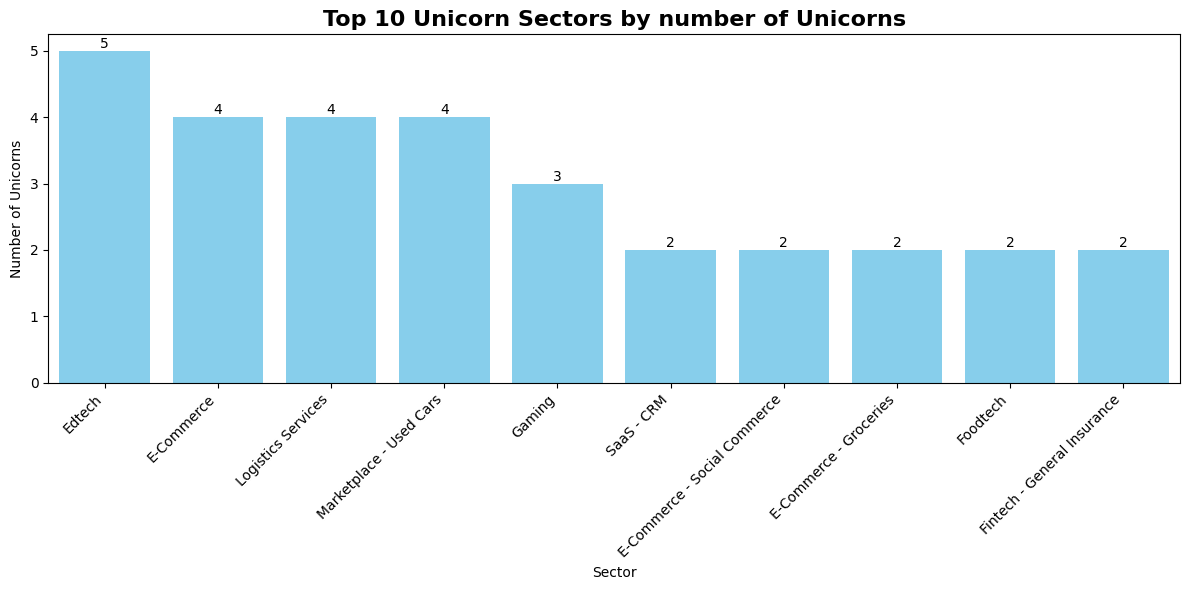

In [68]:
plt.figure(figsize=(12,6))
top_sectors = sector_counts.head(10)
top_sectors.plot(kind='bar', color='skyblue')
bars = plt.bar(range(len(top_sectors)),top_sectors.values,color='skyblue')
plt.title('Top 10 Unicorn Sectors by number of Unicorns', fontsize=16, fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)), top_sectors.index, rotation=45,ha='right')

# Add value labels on bars
for bar, value in zip(bars, top_sectors.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Grographic Distribution

### City-wise Distribution

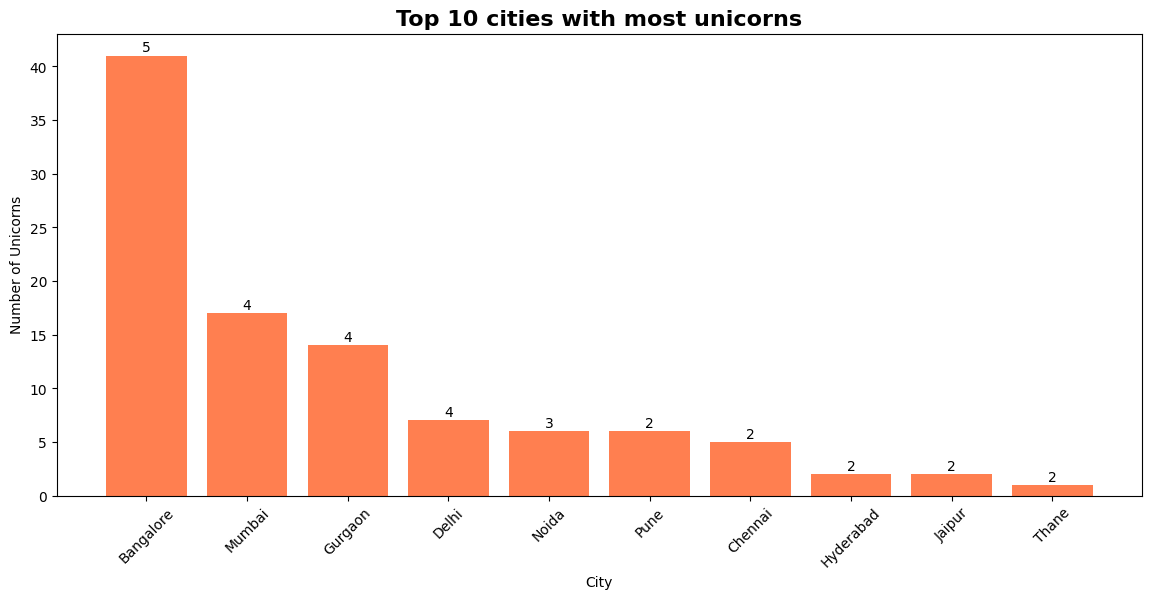

In [69]:
plt.figure(figsize=(14,6))

city_counts=df['Primary_City'].value_counts().head(10)
bars=plt.bar(city_counts.index,city_counts.values,color='coral')
plt.title("Top 10 cities with most unicorns",fontsize=16,fontweight='bold')
plt.xlabel("City")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)

#Add value labels
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

## Create a summer table

In [70]:
city_summary=df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum','mean'],'Entry_Year':['min','max']
}).round(2)
city_summary.columns=['Count','Total_Valuation','Avg_Valuation','First_Entry','Last_Entry']
city_summary.head(10)

,Count,Total_Valuation,Avg_Valuation,First_Entry,Last_Entry
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


## Temprol Analysis

**Entry Year Trend**

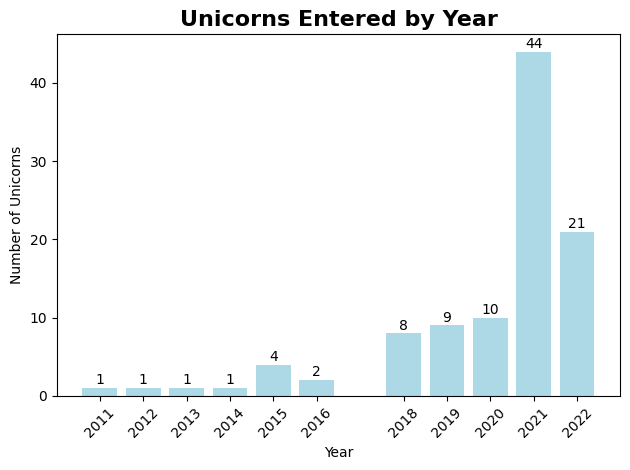

In [71]:
yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='lightblue')
plt.title("Unicorns Entered by Year",fontsize=16,fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Unicorns")
plt.xticks(yearly_entries.index,rotation=45)


#Add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

## Cumulative unicorns

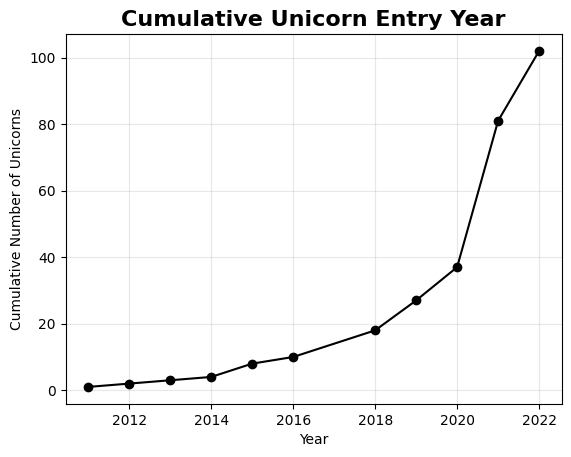

In [72]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linestyle='-',color='black')
plt.title('Cumulative Unicorn Entry Year',fontsize=16,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unicorns')
plt.grid(True,alpha=0.3)
plt.show()

## Average valuation by year

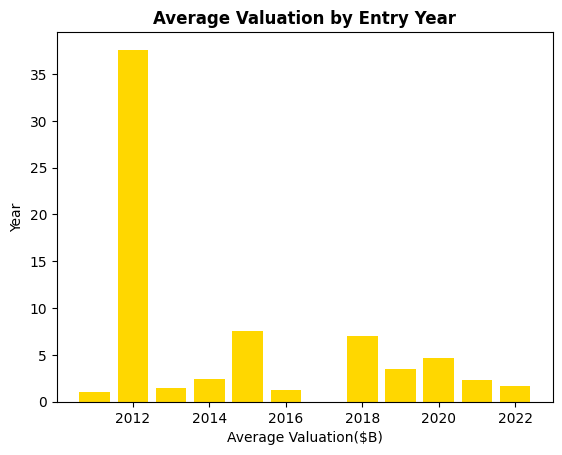

In [73]:
avg_val_year = df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_year.index, avg_val_year.values,color='gold')
plt.title('Average Valuation by Entry Year',fontweight='bold')
plt.xlabel('Average Valuation($B)')
plt.ylabel('Year')
plt.show()

## Sector evolution overtime

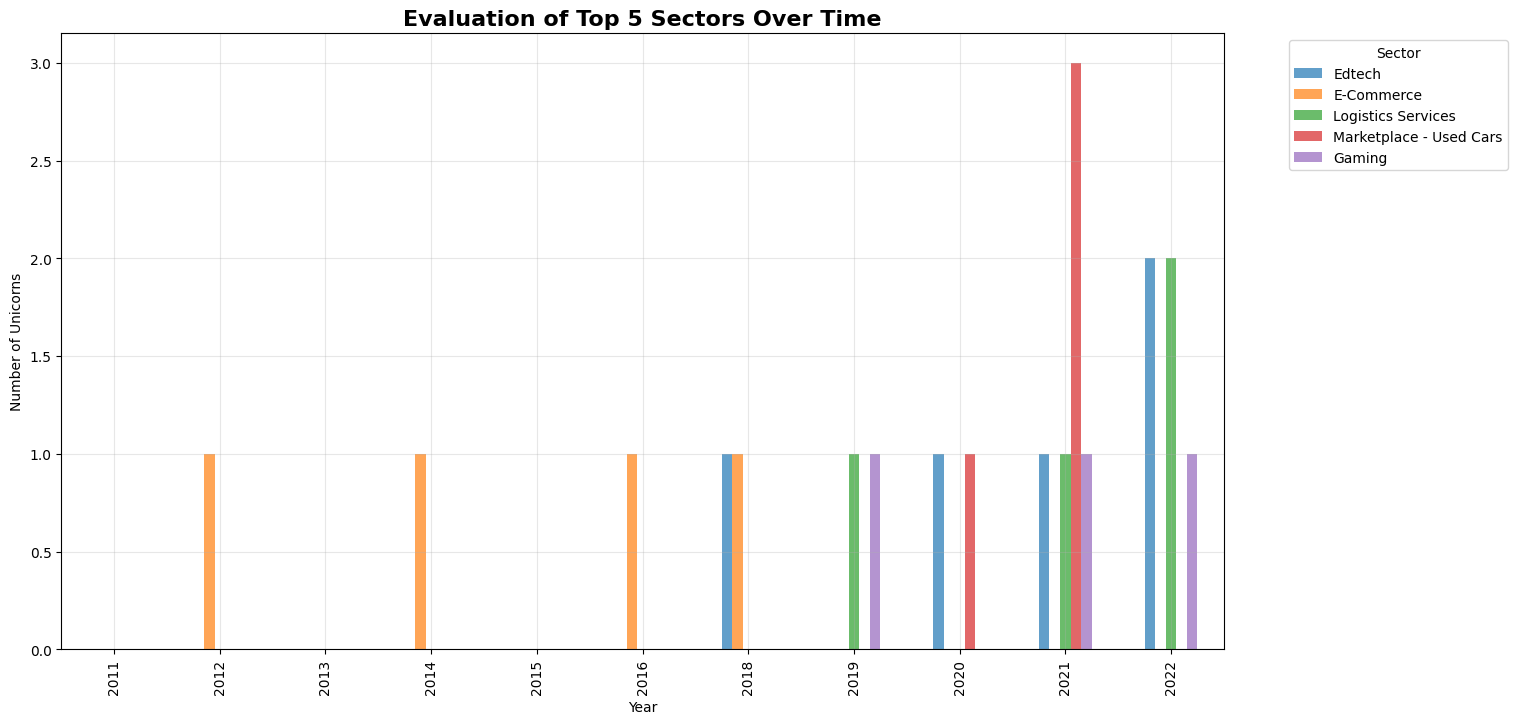

In [74]:
def display_top_k_sector_evolution(df,k):
  # Group by year and sector, count occurrences
  sector_year = df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

  #Select top k sector based overall count
  top_k_sector_names = df['Sector'].value_counts().head(k).index.tolist()
  sector_year = sector_year[top_k_sector_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())

  plt.title(f'Evaluation of Top {k} Sectors Over Time',fontsize=16,fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.grid(True,alpha=0.3)
  plt.show()

# call the function with k=5
display_top_k_sector_evolution(df,5)

## Bivariate Ananlysis

## Valuation vs Sector Analysis

Average valuation by sector

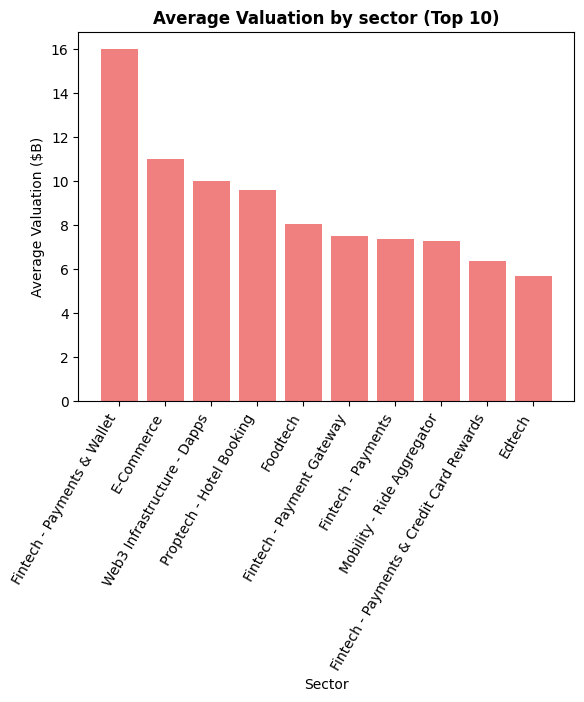

In [75]:
avg_valuation = df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation = avg_valuation.sort_values(ascending=False).head(10)

bars = plt.bar(range(len(avg_valuation)),avg_valuation.values,color='lightcoral')
plt.title('Average Valuation by sector (Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=60,ha='right')
plt.show()


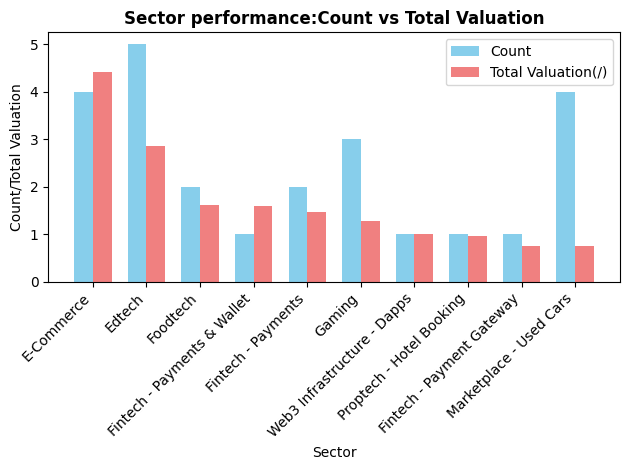

In [76]:
sector_summary = df.groupby('Sector').agg({'Valuation ($B)':['count',sum]}).round(2)
sector_summary.columns=['Count','Total_Valuation']
sector_summary = sector_summary.sort_values(by='Total_Valuation',ascending=False).head(10)


x = np.arange(len(sector_summary))
width = 0.35

plt.bar(x - width/2,sector_summary['Count'],width,label='Count',color='skyblue')
plt.bar(x + width/2, sector_summary['Total_Valuation']/10,width,label='Total Valuation(/)',color='lightcoral')
plt.title('Sector performance:Count vs Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count/Total Valuation')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Geographic va Valution Analysis

###Average valution by city

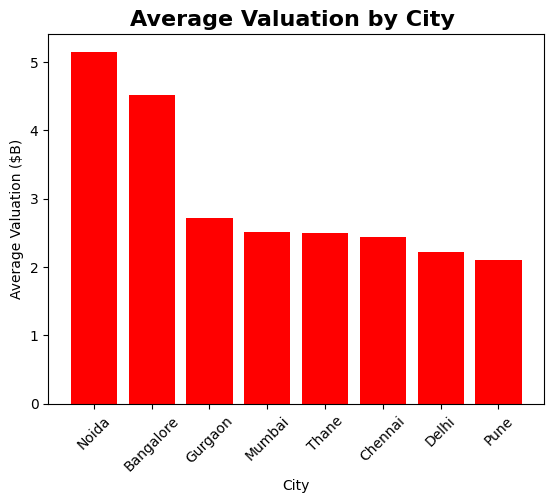

In [77]:
city_valuation =df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation=city_valuation.sort_values(ascending=False).head(8)

bars=plt.bar(city_valuation.index,city_valuation.values,color='red')
plt.title("Average Valuation by City ",fontsize=16,fontweight='bold')
plt.xlabel("City")
plt.ylabel("Average Valuation ($B)")
plt.xticks(rotation=45)
plt.show()

## City vs Count vs Valuation

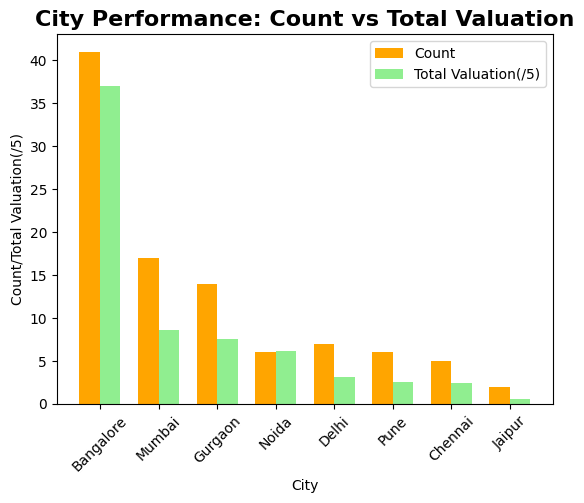

In [78]:
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)': ['count', 'sum']
}).round(2)
city_summary.columns = ['Count', 'Valuation ($B)']
city_summary = city_summary.sort_values('Valuation ($B)', ascending=False).head(8)

x = np.arange(len(city_summary))
width = 0.35

plt.bar(x - width/2, city_summary['Count'], width, label='Count', color='orange')
plt.bar(x + width/2, city_summary['Valuation ($B)'] / 5, width, label='Total Valuation(/5)', color='lightgreen')
plt.title("City Performance: Count vs Total Valuation", fontsize=16, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Count/Total Valuation(/5)")
plt.xticks(x, city_summary.index, rotation=45)
plt.legend()
plt.show()


## Invester and Time  Based Analysis

## Number of Invester vs valuation

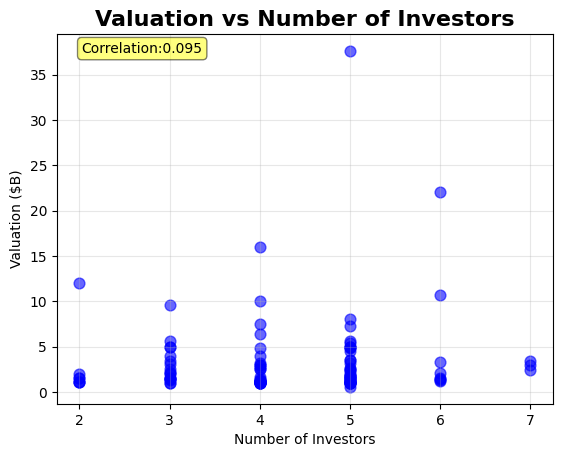

In [81]:
plt.scatter(df['investor_Count'],df['Valuation ($B)'],alpha=0.6,s=60,color='blue')
plt.title("Valuation vs Number of Investors",fontsize=16,fontweight='bold')
plt.xlabel("Number of Investors")
plt.ylabel("Valuation ($B)")
plt.grid(True,alpha=0.3)


correlation=df['investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation:{correlation:.3f}',transform=plt.gca().transAxes,bbox=dict(boxstyle='round,pad=0.3',facecolor='yellow',alpha=0.5))
plt.show()

## Most Active investors

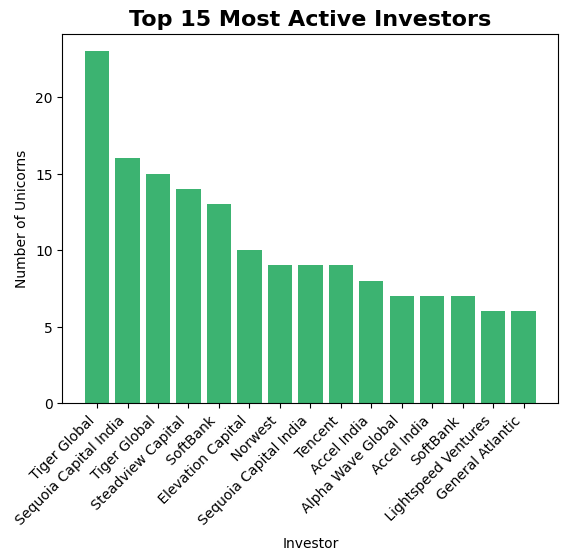

In [85]:
all_investors = []
for investors in df['Select Investors'].dropna():
  all_investors.extend(investors.split(','))

investor_counts=pd.Series(all_investors).value_counts().head(15)
bars = plt.bar(range(len(investor_counts)),investor_counts.values,color='mediumseagreen')
plt.title("Top 15 Most Active Investors",fontsize=16,fontweight='bold')
plt.xlabel("Investor")
plt.ylabel("Number of Unicorns")
plt.xticks(range(len(investor_counts)),investor_counts.index,rotation=45,ha='right')
plt.show()

## Entry year vs Investor Count

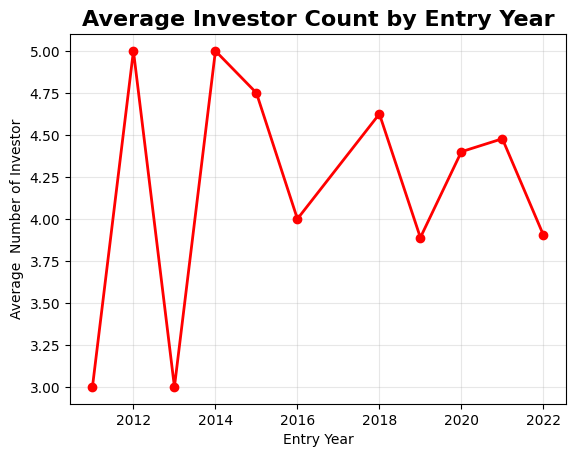

In [87]:
year_investor=df.groupby('Entry_Year')['investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',markersize=6,linewidth=2,color='red')
plt.title('Average Investor Count by Entry Year',fontsize=16,fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average  Number of Investor')
plt.grid(True,alpha=0.3)
plt.show()


## Investor count distrbuation

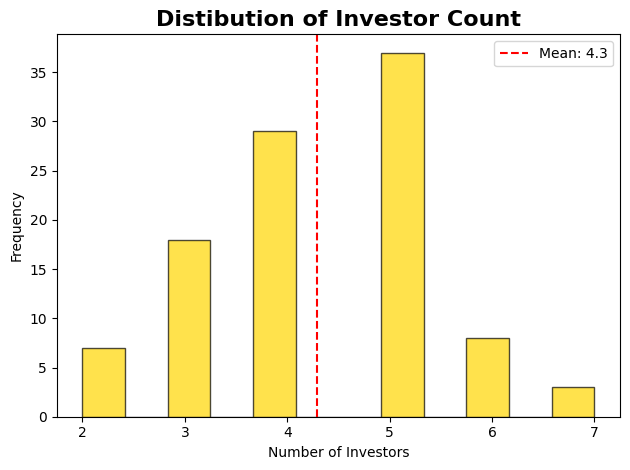

In [92]:
plt.hist(df['investor_Count'],bins=12,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distibution of Investor Count',fontsize=16,fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['investor_Count'].mean(),color='red',linestyle='--',label=f'Mean: {df["investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()